# 20newsgroups
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/20newsgroup.png" width="1200">

This dataset is a collection newsgroup documents. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

Each newsgroup file in the bundle represents a single newsgroup
Each message in a file is the text of some newsgroup document that was posted to that newsgroup.
This is a list of the 20 newsgroups:

- comp.graphics
- comp.os.ms-windows.misc
- comp.sys.ibm.pc.hardware
- comp.sys.mac.hardware
- comp.windows.x rec.autos
- rec.motorcycles
- rec.sport.baseball
- rec.sport.hockey sci.crypt
- sci.electronics
- sci.med
- sci.space
- misc.forsale talk.politics.misc
- talk.politics.guns
- talk.politics.mideast talk.religion.misc
- alt.atheism
- soc.religion.christian

In [1]:
from sklearn.datasets import fetch_20newsgroups

## BOW + TF-IDF

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

newsgroups_train = fetch_20newsgroups(subset='train',shuffle=True)
newsgroups_test = fetch_20newsgroups(subset='test',shuffle=True)

bow = CountVectorizer(stop_words='english',min_df=0.001, max_df=0.20)
bow

CountVectorizer(max_df=0.2, min_df=0.001, stop_words='english')

In [3]:
tfidfconverter = TfidfTransformer()
tfidfconverter

TfidfTransformer()

In [5]:
X_train_bow = bow.fit_transform(newsgroups_train.data).toarray() # La BOW= vettorizzazione con il counting delle freq
X_train_tfidf = tfidfconverter.fit_transform(X_train_bow).toarray()           # applico la trasformazione TF-IDF
y_train = newsgroups_train.target
print(X_train_tfidf.shape, y_train.shape)

X_test_bow = bow.transform(newsgroups_test.data).toarray()
X_test_tfidf = tfidfconverter.transform(X_test_bow).toarray()
y_test = newsgroups_test.target
print(X_test_tfidf.shape, y_test.shape)

(11314, 13188) (11314,)
(7532, 13188) (7532,)


In [7]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train_tfidf,y_train)
y_pred = classifier.predict(X_test_tfidf)
y_prob = classifier.predict_proba(X_test_tfidf)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       319
           1       0.67      0.71      0.69       389
           2       0.68      0.66      0.67       394
           3       0.66      0.71      0.68       392
           4       0.83      0.78      0.80       385
           5       0.83      0.78      0.81       395
           6       0.76      0.83      0.79       390
           7       0.86      0.86      0.86       396
           8       0.90      0.94      0.92       398
           9       0.94      0.91      0.93       397
          10       0.94      0.98      0.96       399
          11       0.90      0.90      0.90       396
          12       0.76      0.72      0.74       393
          13       0.87      0.79      0.83       396
          14       0.87      0.90      0.88       394
          15       0.81      0.93      0.87       398
          16       0.75      0.89      0.81       364
          17       0.96    

Text(145.72222222222223, 0.5, 'Actual')

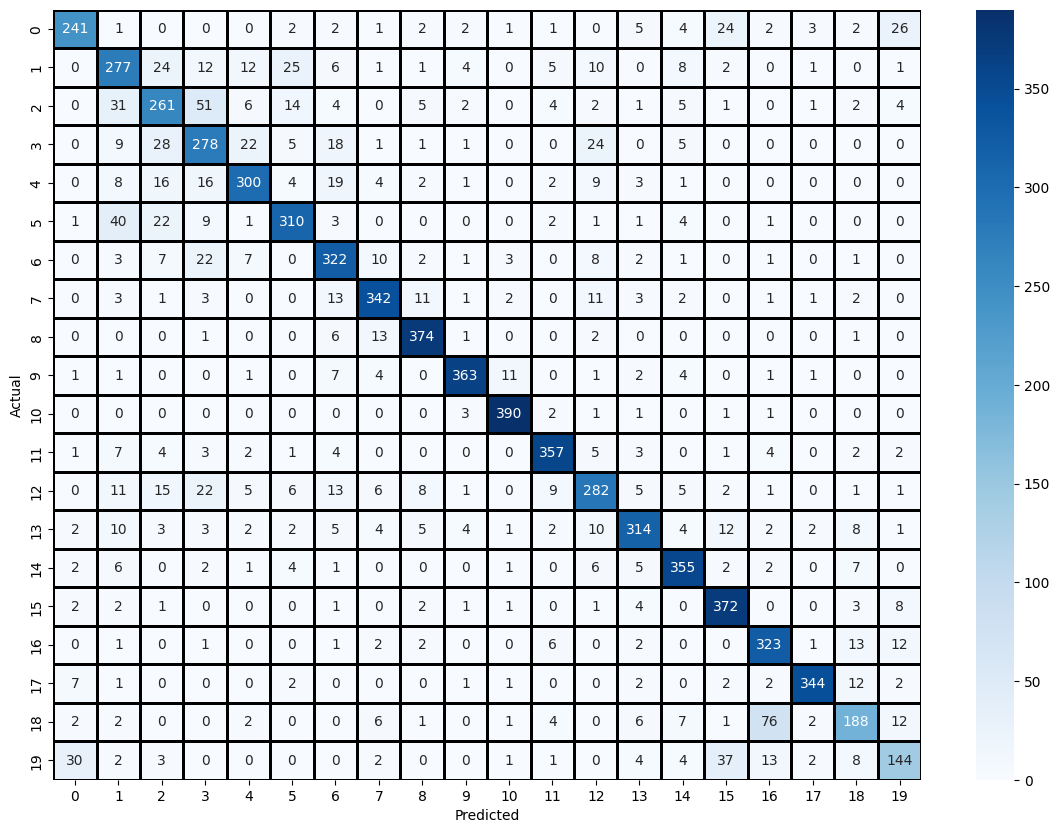

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50,max_depth=5)
classifier.fit(X_train_tfidf,y_train)
y_pred = classifier.predict(X_test_tfidf)
y_prob = classifier.predict_proba(X_test_tfidf)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.81      0.28      0.41       319
           1       0.60      0.44      0.51       389
           2       0.59      0.62      0.60       394
           3       0.60      0.26      0.36       392
           4       0.67      0.62      0.65       385
           5       0.70      0.50      0.59       395
           6       0.85      0.72      0.78       390
           7       0.75      0.60      0.67       396
           8       0.88      0.78      0.83       398
           9       0.82      0.53      0.64       397
          10       0.58      0.84      0.68       399
          11       0.73      0.88      0.80       396
          12       0.15      0.52      0.23       393
          13       0.60      0.40      0.48       396
          14       0.69      0.80      0.74       394
          15       0.51      0.90      0.65       398
          16       0.55      0.58      0.57       364
          17       0.82    

Text(145.72222222222223, 0.5, 'Actual')

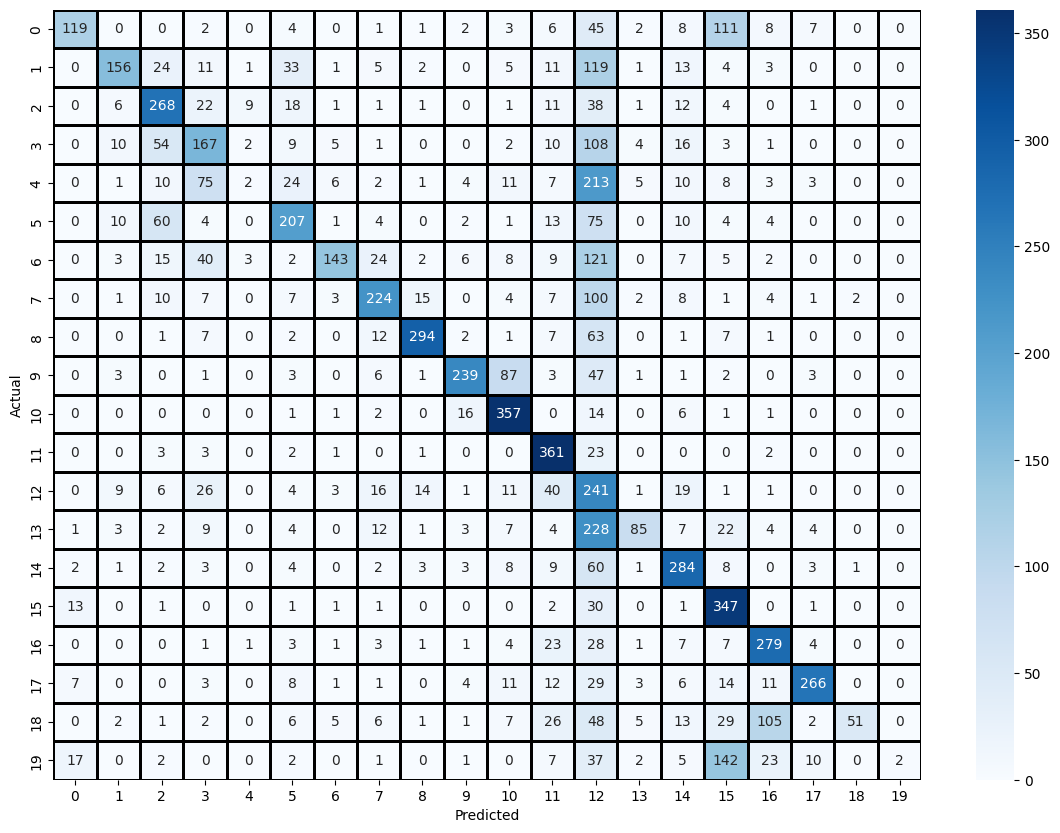

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")

## Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

bow = CountVectorizer(stop_words='english')
tfidf = TfidfTransformer()
classifier = MultinomialNB(alpha=.01)

pipe = Pipeline([('bow', bow),
                 ('tfidf', tfidf),
                 ('estimator', classifier),
                ])

pipe.fit(newsgroups_train.data,newsgroups_train.target)
y_pred = pipe.predict(newsgroups_test.data)
f1_score(y_test, y_pred, average='macro')

0.8278889894475222

Text(145.72222222222223, 0.5, 'Actual')

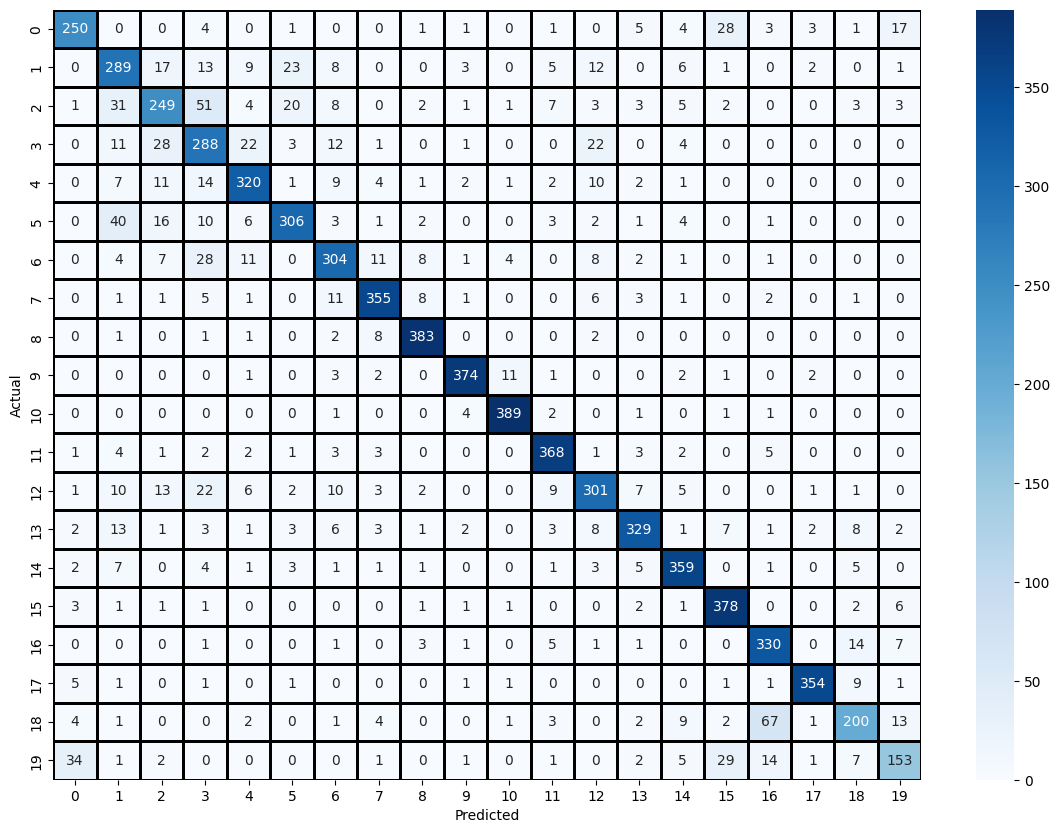

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")